In [1]:
import numpy as np
import matplotlib.pyplot as plt
import perturbations
import estimators
from statistical_problems import GaussianLocation, UniformLocation, LinearRegression
from simulation import Simulation


In [2]:

# Define problem parameters
gaussian_params = {
    'n': 10,
    'p': 3,
    'theta': np.array([0.0, 0.0, 0.0]),
    'sigma': np.diag([1/6, 2/6, 3/6]),
    
    'perturbation_class' : 'JDS'
}

uniform_params = {
    'n':50,
    'p':1,
    'theta' : np.array([3]),
    'perturbation_class' : 'JDS'
}

linear_regression_params = {
    'n':10,
    'p':5,
    'theta' : np.ones(5),
    'perturbation_class' : 'JDS'
}


def get_statistical_problem(problem_type, loss_type = "squared_error", sigma = None):
    new_params = {"loss": loss_type}
    if sigma is not None:
        new_params["sigma"] = sigma
    if problem_type == "Gaussian":
        # Create a GaussianMean problem instance
        problem = GaussianLocation(**(gaussian_params | new_params))
    elif problem_type == "Uniform":
        # Create a UniformMean problem instance
        problem = UniformLocation(**(uniform_params | new_params))
    elif problem_type == "Linear Regression":
        # Create a Linear Regression problem instance
        n,p = linear_regression_params['n'],linear_regression_params['p']
        X = np.random.normal(size = (n,p))/np.sqrt(n)
        linear_regression_params['X'] = X
        problem = LinearRegression(**(linear_regression_params | new_params))
    else:
        raise NotImplementedError
    return problem

# Define epsilon values 
alpha_values = np.linspace(-2.5, 0, 40)

# Run Individual Simulation

100%|██████████| 40/40 [00:00<00:00, 81.19it/s]


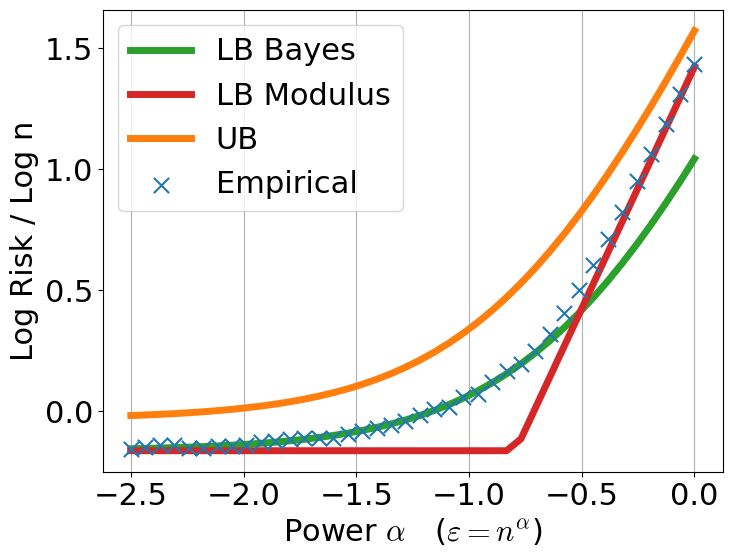

In [3]:
########################################
########### VALUES TO MODIFY ###########
########################################
problem_type = "Linear Regression" # Options are: "Gaussian", "Uniform", "Linear Regression"
lr_sigma_type = "heteroskedastic" # Only for linear regression Options are: "homoskedastic", "heteroskedastic"
num_copies = 5000 # Number of simulated copies, decrease for faster run time
loss_type = "squared_error" # Options are: "squared_error" for all problems, "prediction_error" for linear regression
########################################
########################################
########################################

sigma = None 
if problem_type == "Linear Regression":
    if lr_sigma_type == "homoskedastic":
        sigma = np.eye(10)/100
    elif lr_sigma_type == "heteroskedastic":
        sigma = np.diag([(i+1)/200 for i in range(10)])
    else:
        print(f"Invalid sigma type: {lr_sigma_type}. Must be 'homoskedastic' or 'heteroskedastic'.")
        raise NotImplementedError
display_est = "best"

problem = get_statistical_problem(problem_type,loss_type = loss_type, sigma=sigma)
epsilon_values = np.power(problem.n, alpha_values)

# Create and run the simulation
simulation = Simulation(problem, epsilon_values, num_copies, display_est)
results = simulation.run_simulation()

# Generate the plot
plt.rcParams['figure.figsize'] = [8, 6]

simulation.display_est = "best"
simulation.generate_plot(results)


# Run All Simulations

Running Gaussian with squared_error loss and sigma num 1/1


100%|██████████| 40/40 [00:03<00:00, 10.71it/s]


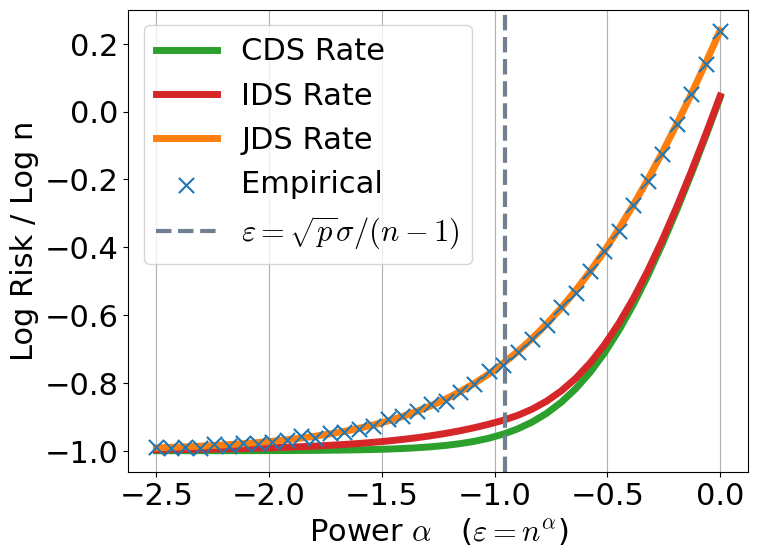

Running Linear Regression with squared_error loss and sigma num 1/2


100%|██████████| 40/40 [00:01<00:00, 32.59it/s]


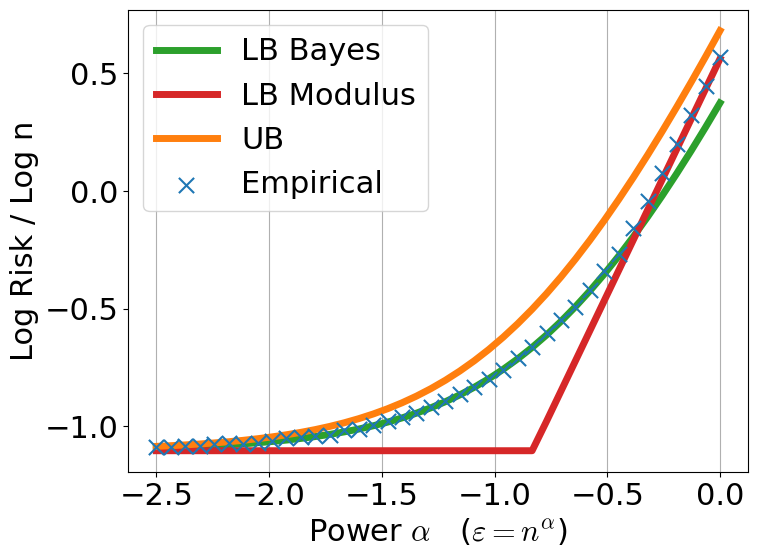

Running Linear Regression with squared_error loss and sigma num 2/2


100%|██████████| 40/40 [00:01<00:00, 35.61it/s]


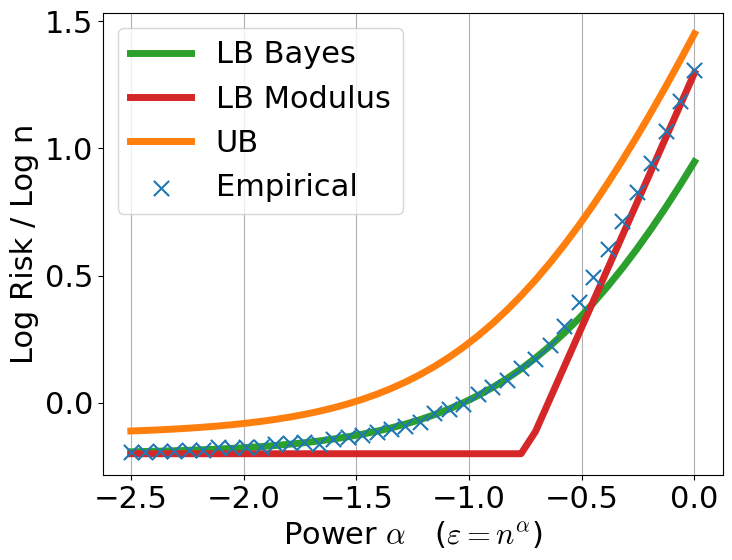

Running Linear Regression with prediction_error loss and sigma num 1/2


100%|██████████| 40/40 [00:01<00:00, 31.24it/s]


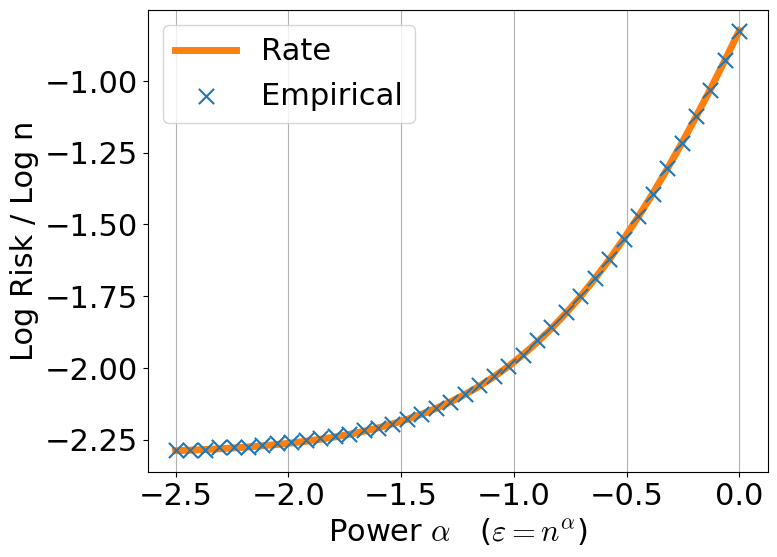

Running Linear Regression with prediction_error loss and sigma num 2/2


100%|██████████| 40/40 [00:01<00:00, 32.97it/s]


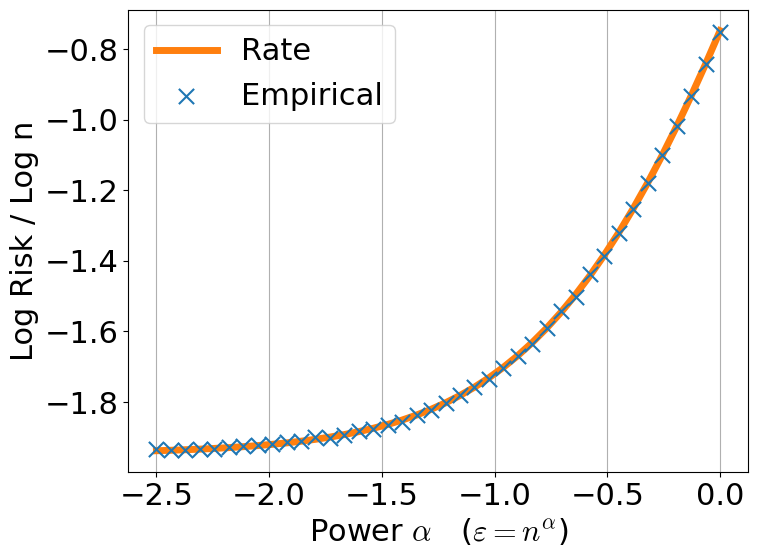

In [4]:
############################
### Run all simulations! ###
############################
display_est = "best"
num_copies = 10000
for problem_type in ["Gaussian","Linear Regression"]:
    all_sigma = [None]
    losses = ["squared_error"]
    if problem_type == "Linear Regression":
        all_sigma = [np.eye(10)/100, np.diag([(i+1)/200 for i in range(10)])]
        losses.append("prediction_error")
    for loss in losses:
        for i, sigma in enumerate(all_sigma):
            print(f"Running {problem_type} with {loss} loss and sigma num {i+1}/{len(all_sigma)}")
            problem = get_statistical_problem(problem_type, sigma=sigma, loss_type=loss)
            epsilon_values = np.power(problem.n, alpha_values)

            # Create and run the simulation
            
            simulation = Simulation(problem, epsilon_values, num_copies, display_est)
            results = simulation.run_simulation()
            
            plt.rcParams['figure.figsize'] = [8, 6]

            simulation.display_est = display_est
            simulation.generate_plot(results)
